In [25]:
import plotdensity as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial as scs
import scipy.integrate
from scipy.interpolate import CubicSpline
import scipy.spatial.transform as sst
import functools
import copy
from ase.units import Bohr
import finitediff 
from scipy.optimize import curve_fit

In [27]:
a=pl.CUBE("H.cube")
#b=pl.CUBE("1order.txt")
e02=pl.CUBE("whole_cube_file_delta_0.02_approx_zero_0.01.txt")
e03=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01.txt")
e04=pl.CUBE("whole_cube_file_delta_0.04_approx_zero_0.01.txt")
e05=pl.CUBE("whole_cube_file_delta_0.05_approx_zero_0.01.txt")
e06=pl.CUBE("whole_cube_file_delta_0.06_approx_zero_0.01.txt")
e07=pl.CUBE("whole_cube_file_delta_0.07_approx_zero_0.01.txt")
e0725=pl.CUBE("whole_cube_file_delta_0.0725_approx_zero_0.01.txt")
e075=pl.CUBE("whole_cube_file_delta_0.075_approx_zero_0.01.txt")
e0775=pl.CUBE("whole_cube_file_delta_0.0775_approx_zero_0.01.txt")
e08=pl.CUBE("whole_cube_file_delta_0.08_approx_zero_0.01.txt")
e0825=pl.CUBE("whole_cube_file_delta_0.0825_approx_zero_0.01.txt")
e085=pl.CUBE("whole_cube_file_delta_0.085_approx_zero_0.01.txt")
e0875=pl.CUBE("whole_cube_file_delta_0.0875_approx_zero_0.01.txt")
e09=pl.CUBE("whole_cube_file_delta_0.09_approx_zero_0.01.txt")
e10=pl.CUBE("whole_cube_file_delta_0.1_approx_zero_0.01.txt")
e15=pl.CUBE("whole_cube_file_delta_0.15_approx_zero_0.01.txt")
e20=pl.CUBE("whole_cube_file_delta_0.2_approx_zero_0.01.txt")
#e25=pl.CUBE("whole_cube_file_delta_0.25_approx_zero_0.01.txt")
#e30=pl.CUBE("whole_cube_file_delta_0.3_approx_zero_0.01.txt")

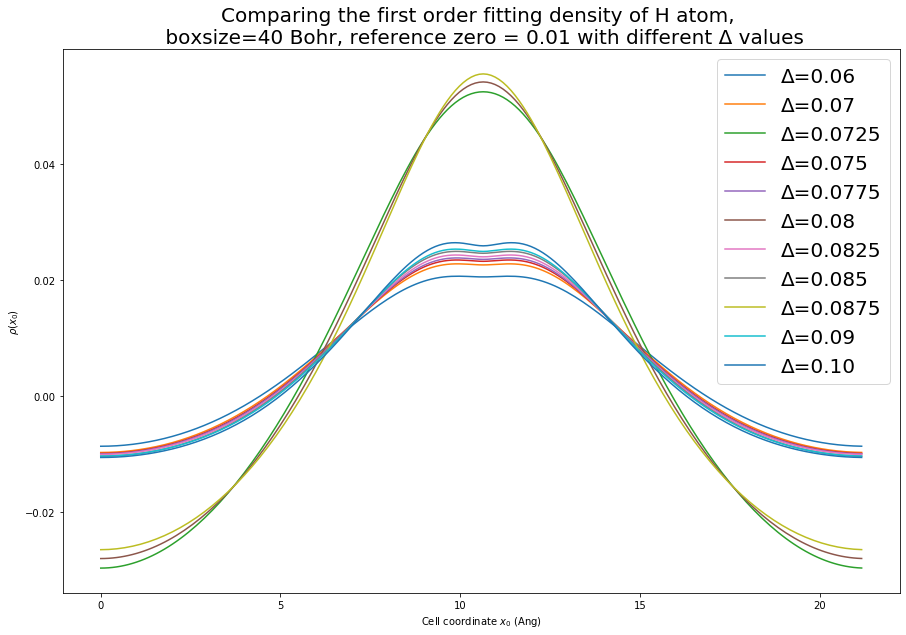

In [41]:
coordinate = np.linspace(a.origin[0], a.X[0]*a.NX*Bohr, a.NX)
fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
d002_ueg_001=e02.project((0,1))
d003_ueg_001=e03.project((0,1))
d004_ueg_001=e04.project((0,1))
d005_ueg_001=e05.project((0,1))
d006_ueg_001=e06.project((0,1))
d007_ueg_001=e07.project((0,1))
d00725_ueg_001=e0725.project((0,1))
d0075_ueg_001=e075.project((0,1))
d00775_ueg_001=e0775.project((0,1))
d008_ueg_001=e08.project((0,1))
d00825_ueg_001=e0825.project((0,1))
d0085_ueg_001=e085.project((0,1))
d00875_ueg_001=e0875.project((0,1))
d009_ueg_001=e09.project((0,1))
d010_ueg_001=e10.project((0,1))
d015_ueg_001=e15.project((0,1))
d020_ueg_001=e20.project((0,1))
#d025_ueg_001=e25.project((0,1))
#d030_ueg_001=e30.project((0,1))

#ax.plot(coordinate, H,label="H atom")
#ax.plot(coordinate, d002_ueg_001,label="Δ=0.02")
#ax.plot(coordinate, d003_ueg_001,label="Δ=0.03")
#ax.plot(coordinate, d004_ueg_001,label="Δ=0.04")
#ax.plot(coordinate, d005_ueg_001,label="Δ=0.05")
ax.plot(coordinate, d006_ueg_001,label="Δ=0.06")
ax.plot(coordinate, d007_ueg_001,label="Δ=0.07")                  # down
ax.plot(coordinate, d00725_ueg_001,label="Δ=0.0725")              # up
ax.plot(coordinate, d0075_ueg_001,label="Δ=0.075")                # down
ax.plot(coordinate, d00775_ueg_001,label="Δ=0.0775")              # down 
ax.plot(coordinate, d008_ueg_001,label="Δ=0.08")                  # up
ax.plot(coordinate, d00825_ueg_001,label="Δ=0.0825")              # down
ax.plot(coordinate, d0085_ueg_001,label="Δ=0.085")                # down
ax.plot(coordinate, d00875_ueg_001,label="Δ=0.0875")              # up 
ax.plot(coordinate, d009_ueg_001,label="Δ=0.09")                  # down
ax.plot(coordinate, d010_ueg_001,label="Δ=0.10")                  # down
#ax.plot(coordinate, d015_ueg_001,label="Δ=0.15")                  # up
#ax.plot(coordinate, d020_ueg_001,label="Δ=0.20")                  # up


ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)')
ax.set_ylabel(r'$\rho (x_0)$')
ax.legend(fontsize=20)
ax.set_title("Comparing the first order fitting density of H atom, \n boxsize=40 Bohr, reference zero = 0.01 with different Δ values" ,fontsize=20)
plt.savefig("compare1.png")

In [40]:
e0825.project((0,1)).sum()

0.9999953758115236

In [42]:
a=pl.CUBE("H.cube")
#b=pl.CUBE("1order.txt")
u0e001=pl.CUBE("whole_cube_file_delta_0.01_approx_zero_0.0.txt")
u0e003=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.0.txt")
u0e005=pl.CUBE("whole_cube_file_delta_0.05_approx_zero_0.0.txt")
u0e007=pl.CUBE("whole_cube_file_delta_0.07_approx_zero_0.0.txt")
u0e00725=pl.CUBE("whole_cube_file_delta_0.0725_approx_zero_0.0.txt")
u0e008=pl.CUBE("whole_cube_file_delta_0.08_approx_zero_0.0.txt")
u0e00875=pl.CUBE("whole_cube_file_delta_0.0875_approx_zero_0.0.txt")
u0e009=pl.CUBE("whole_cube_file_delta_0.09_approx_zero_0.0.txt")

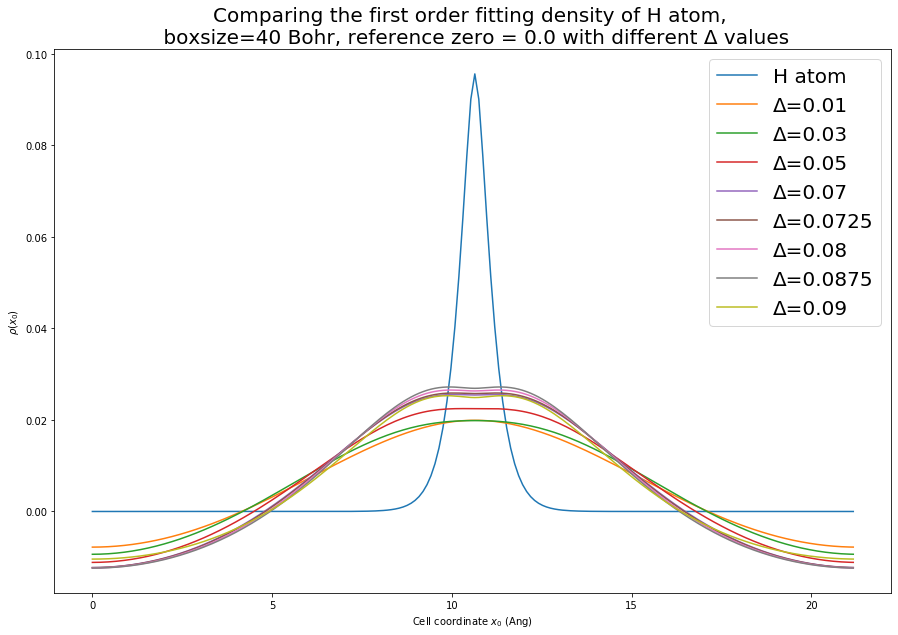

In [45]:
coordinate = np.linspace(a.origin[0], a.X[0]*a.NX*Bohr, a.NX)
fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
d001_ueg_0=u0e001.project((0,1))
d003_ueg_0=u0e003.project((0,1))
d005_ueg_0=u0e005.project((0,1))
d007_ueg_0=u0e007.project((0,1))
d00725_ueg_0=u0e00725.project((0,1))
d008_ueg_0=u0e008.project((0,1))
d00875_ueg_0=u0e00875.project((0,1))
d009_ueg_0=e09.project((0,1))

ax.plot(coordinate, H,label="H atom")
ax.plot(coordinate, d001_ueg_0,label="Δ=0.01")
ax.plot(coordinate, d003_ueg_0,label="Δ=0.03")
ax.plot(coordinate, d005_ueg_0,label="Δ=0.05")
ax.plot(coordinate, d007_ueg_0,label="Δ=0.07")                  #  
ax.plot(coordinate, d00725_ueg_0,label="Δ=0.0725")              #  
ax.plot(coordinate, d008_ueg_0,label="Δ=0.08")                  #  
ax.plot(coordinate, d00875_ueg_0,label="Δ=0.0875")              #  
ax.plot(coordinate, d009_ueg_0,label="Δ=0.09")                  #  

ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)')
ax.set_ylabel(r'$\rho (x_0)$')
ax.legend(fontsize=20)
ax.set_title("Comparing the first order fitting density of H atom, \n boxsize=40 Bohr, reference zero = 0.0 with different Δ values" ,fontsize=20)
plt.savefig("compare1.png")

In [235]:
a=pl.CUBE("H.cube")
#b=pl.CUBE("1order.txt")
b05=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01_boxsize_5.txt")
b10=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01_boxsize_10.txt")
b20=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01_boxsize_20.txt")
b30=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01_boxsize_30.txt")
b40=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01.txt")
b50=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01_boxsize_50.txt")

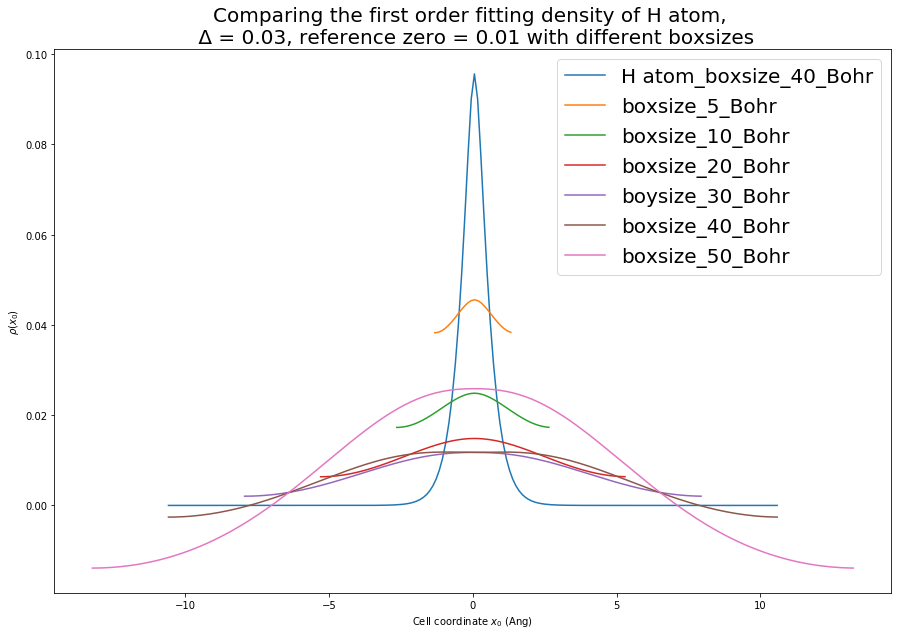

In [236]:
coordinate = np.linspace(a.origin[0]-20.0*Bohr, a.X[0]*a.NX*Bohr-20.0*Bohr, a.NX)
coordinate5 = np.linspace(b05.origin[0]-2.5*Bohr, b05.X[0]*b05.NX*Bohr-2.5*Bohr, b05.NX)
coordinate10 = np.linspace(b10.origin[0]-5.0*Bohr, b10.X[0]*b10.NX*Bohr-5.0*Bohr, b10.NX)
coordinate20 = np.linspace(b20.origin[0]-10.0*Bohr, b20.X[0]*b20.NX*Bohr-10.0*Bohr, b20.NX)
coordinate30 = np.linspace(b30.origin[0]-15.0*Bohr, b30.X[0]*b30.NX*Bohr-15.0*Bohr, b30.NX)
coordinate40 = np.linspace(b40.origin[0]-20.0*Bohr, b40.X[0]*b40.NX*Bohr-20.0*Bohr, b40.NX)
coordinate50 = np.linspace(b50.origin[0]-25.0*Bohr, b50.X[0]*b50.NX*Bohr-25.0*Bohr, b50.NX)

fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
boxsize_5_d003_ueg_001=b05.project((0,1))
boxsize_10_d003_ueg_001=b10.project((0,1))
boxsize_20_d003_ueg_001=b20.project((0,1))
boxsize_30_d003_ueg_001=b30.project((0,1))
boxsize_40_d003_ueg_001=b40.project((0,1))
boxsize_50_d003_ueg_001=b50.project((0,1))

ax.plot(coordinate, H,label="H atom_boxsize_40_Bohr")
ax.plot(coordinate5, boxsize_5_d003_ueg_001,label="boxsize_5_Bohr")
ax.plot(coordinate10, boxsize_10_d003_ueg_001,label="boxsize_10_Bohr")
ax.plot(coordinate20, boxsize_20_d003_ueg_001,label="boxsize_20_Bohr")
ax.plot(coordinate30, boxsize_30_d003_ueg_001,label="boysize_30_Bohr")
ax.plot(coordinate40, boxsize_40_d003_ueg_001,label="boxsize_40_Bohr")
ax.plot(coordinate50, boxsize_50_d003_ueg_001,label="boxsize_50_Bohr")

ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)')
ax.set_ylabel(r'$\rho (x_0)$')
ax.legend(fontsize=20)
ax.set_title("Comparing the first order fitting density of H atom, \n Δ = 0.03, reference zero = 0.01 with different boxsizes",fontsize=20)
plt.savefig("compare2.png")

In [291]:
b50.project((0,1)).sum()

0.9999980805967816

In [3]:
a=pl.CUBE("H.cube")
#b=pl.CUBE("1order.txt")
u0=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.0.txt")
u00001=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.0001.txt")
u00005=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.0005.txt")
u0001=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.001.txt")
u0003=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.003.txt")
u0005=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.005.txt")
u0007=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.007.txt")
u0010=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.01.txt")
u0020=pl.CUBE("whole_cube_file_delta_0.03_approx_zero_0.02.txt")

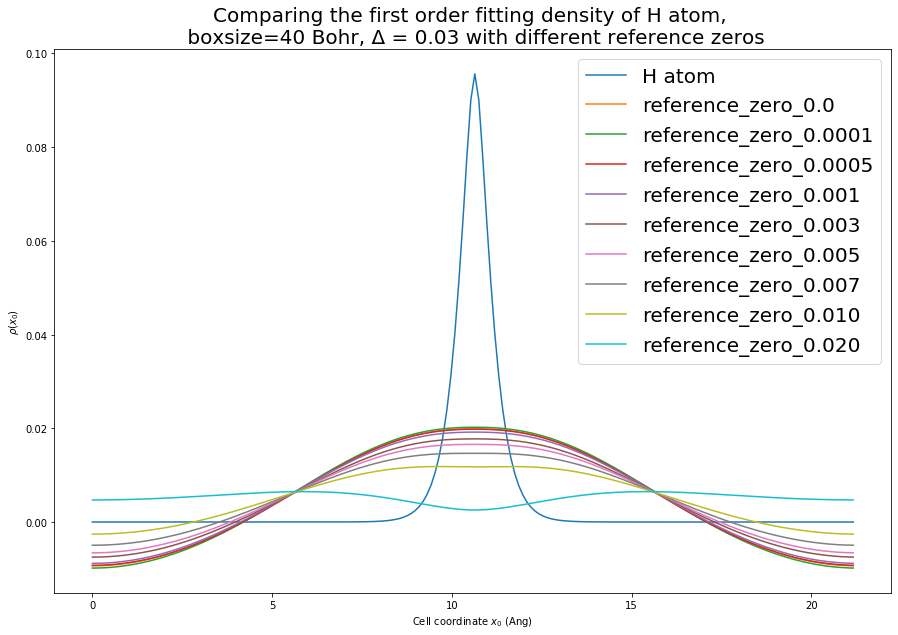

In [4]:
coordinate = np.linspace(a.origin[0], a.X[0]*a.NX*Bohr, a.NX)
fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
d003_ueg_0=u0.project((0,1))
d003_ueg_00001=u00001.project((0,1))
d003_ueg_00005=u00005.project((0,1))
d003_ueg_0001=u0001.project((0,1))
d003_ueg_0003=u0003.project((0,1))
d003_ueg_0005=u0005.project((0,1))
d003_ueg_0007=u0007.project((0,1))
d003_ueg_0010=u0010.project((0,1))
d003_ueg_0020=u0020.project((0,1))


ax.plot(coordinate, H,label="H atom")
ax.plot(coordinate, d003_ueg_0,label="reference_zero_0.0")
ax.plot(coordinate, d003_ueg_00001,label="reference_zero_0.0001")
ax.plot(coordinate, d003_ueg_00005,label="reference_zero_0.0005")
ax.plot(coordinate, d003_ueg_0001,label="reference_zero_0.001")
ax.plot(coordinate, d003_ueg_0003,label="reference_zero_0.003")
ax.plot(coordinate, d003_ueg_0005,label="reference_zero_0.005")
ax.plot(coordinate, d003_ueg_0007,label="reference_zero_0.007")
ax.plot(coordinate, d003_ueg_0010,label="reference_zero_0.010")
ax.plot(coordinate, d003_ueg_0020,label="reference_zero_0.020")

ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)')
ax.set_ylabel(r'$\rho (x_0)$')
ax.legend(fontsize=20)
ax.set_title("Comparing the first order fitting density of H atom, \n boxsize=40 Bohr, Δ = 0.03 with different reference zeros",fontsize=20)
plt.savefig("compare0.png")

In [6]:
u0020.project((0,1)).sum()

0.9999923490735523

In [206]:
a=pl.CUBE("H.cube")
b=pl.CUBE("1order.txt")
manual2ordersim=pl.CUBE("2order_sim.txt")

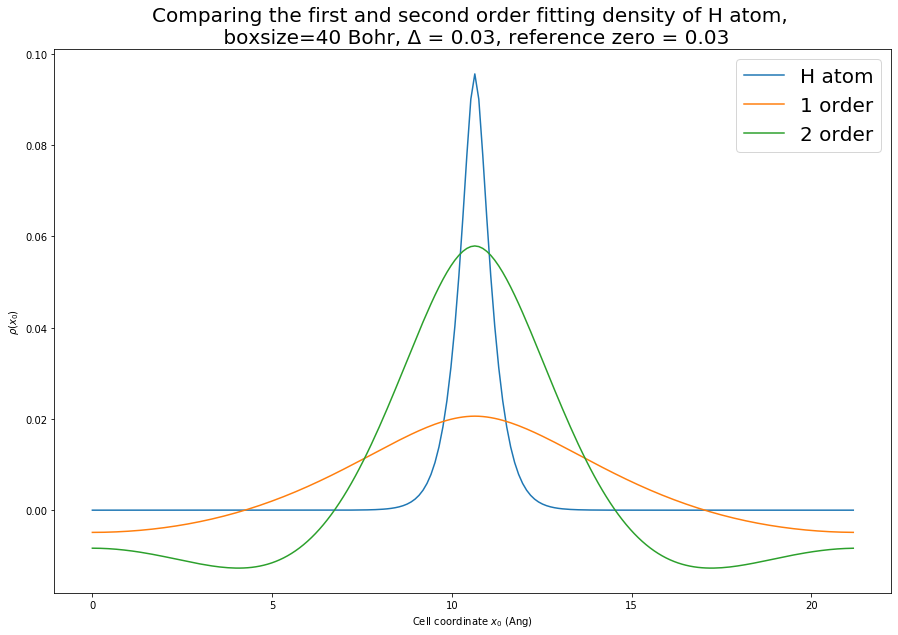

In [219]:
coordinate = np.linspace(a.origin[0], a.X[0]*a.NX*Bohr, a.NX)
fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
m1=b.project((0,1))
m2s=manual2ordersim.project((0,1))

ax.plot(coordinate, H,label="H atom")
ax.plot(coordinate, m1,label="1 order")
ax.plot(coordinate, m2s,label="2 order")

ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)')
ax.set_ylabel(r'$\rho (x_0)$')
ax.legend(fontsize=20)
ax.set_title("Comparing the first and second order fitting density of H atom, \n boxsize=40 Bohr, Δ = 0.03, reference zero = 0.03",fontsize=20)
plt.savefig("compare3.png")

In [57]:
a=pl.CUBE("H.cube")
lambda_0=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.0.txt")
lambda_01=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.1.txt")
lambda_02=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.2.txt")
lambda_03=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.3.txt")
lambda_04=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.4.txt")
lambda_05=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.5.txt")
lambda_06=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.6.txt")
lambda_07=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.7.txt")
lambda_08=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.8.txt")
lambda_09=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_0.9.txt")
lambda_10=pl.CUBE("./diff_lambda_new/whole_cube_file_lambda_1.0.txt")

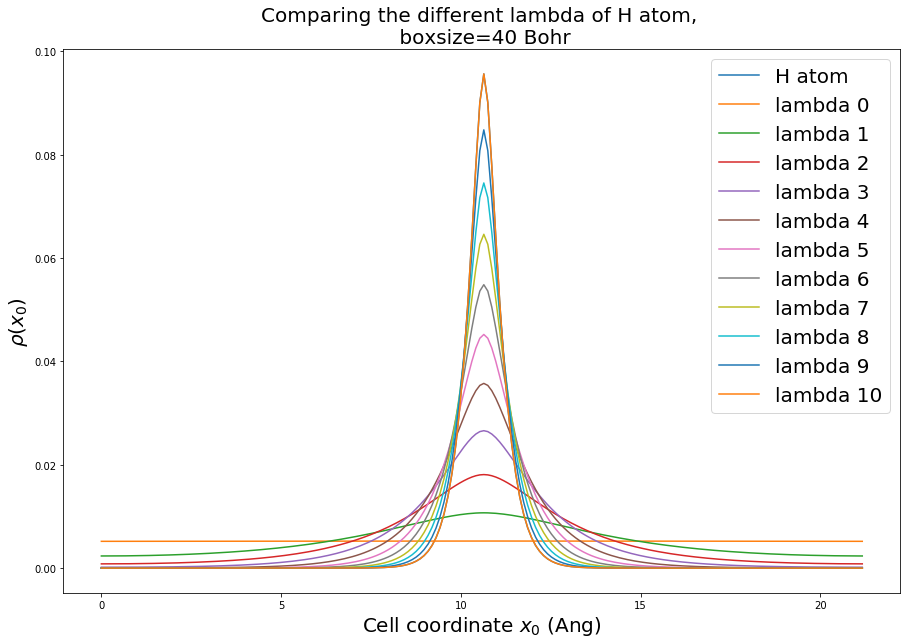

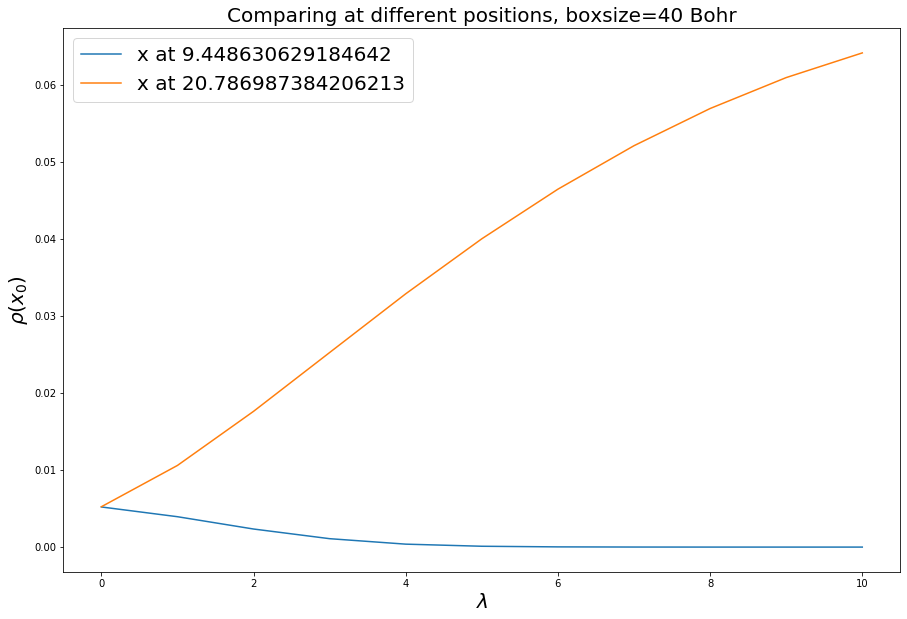

In [98]:
coordinate = np.linspace(a.origin[0], a.X[0]*a.NX*Bohr, a.NX)
fig, ax = plt.subplots(1,1, figsize=(15,10))

H=a.project((0,1))
l0=lambda_0.project((0,1))
l1=lambda_01.project((0,1))
l2=lambda_02.project((0,1))
l3=lambda_03.project((0,1))
l4=lambda_04.project((0,1))
l5=lambda_05.project((0,1))
l6=lambda_06.project((0,1))
l7=lambda_07.project((0,1))
l8=lambda_08.project((0,1))
l9=lambda_09.project((0,1))
l10=lambda_10.project((0,1))

ax.plot(coordinate, H,label="H atom")
ax.plot(coordinate, l0,label="lambda 0")
ax.plot(coordinate, l1,label="lambda 1")
ax.plot(coordinate, l2,label="lambda 2")
ax.plot(coordinate, l3,label="lambda 3")
ax.plot(coordinate, l4,label="lambda 4")
ax.plot(coordinate, l5,label="lambda 5")
ax.plot(coordinate, l6,label="lambda 6")
ax.plot(coordinate, l7,label="lambda 7")
ax.plot(coordinate, l8,label="lambda 8")
ax.plot(coordinate, l9,label="lambda 9")
ax.plot(coordinate, l10,label="lambda 10")

ax.set_xlabel(r'Cell coordinate $x_0$ (Ang)',fontsize=20)
ax.set_ylabel(r'$\rho (x_0)$',fontsize=20)
ax.legend(fontsize=20)
ax.set_title("Comparing the different lambda of H atom, \n boxsize=40 Bohr",fontsize=20)
plt.savefig("compare3.png")

small_num = 5/Bohr
big_num = 11/Bohr
pos1 = int(len(coordinate)*small_num/40)
pos2 = int(len(coordinate)*big_num/40)
pos_small = [l0[pos1],l1[pos1],l2[pos1],l3[pos1],l4[pos1],l5[pos1],l6[pos1],l7[pos1],l8[pos1],l9[pos1],l10[pos1]]
pos_big = [l0[pos2],l1[pos2],l2[pos2],l3[pos2],l4[pos2],l5[pos2],l6[pos2],l7[pos2],l8[pos2],l9[pos2],l10[pos2]]

fig2, ax2 = plt.subplots(1,1, figsize=(15,10))

ax2.plot(range(11), pos_small, label="x at {}".format(small_num))
ax2.plot(range(11), pos_big, label = "x at {}".format(big_num))
ax2.set_xlabel(r'$\lambda$',fontsize=20)
ax2.set_ylabel(r'$\rho (x_0)$',fontsize=20)
ax2.set_title("Comparing at different positions, boxsize=40 Bohr",fontsize=20)
ax2.legend(fontsize=20)


In [19]:
lambda_0.project((0,1)).sum()

0.999995247397859

root mean squared error is  0.0022439572886839712
coefficients are  [-0.48174683  0.07049311 -0.03057534]
         2
-0.4817 x + 0.07049 x - 0.03058


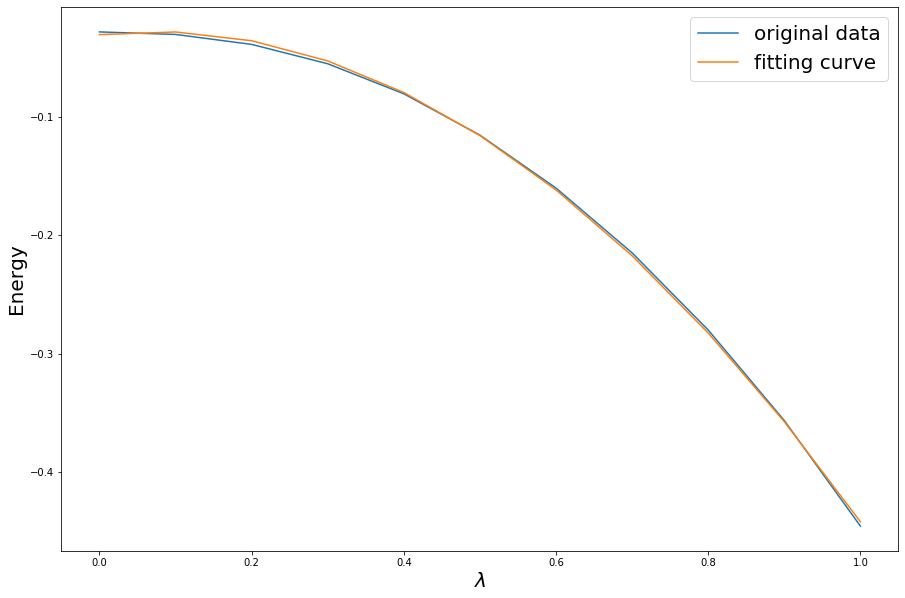

In [55]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

plot_E = np.loadtxt("./diff_lambda_new/total_energy.dat")
fig, ax = plt.subplots(1,1, figsize=(15,10))

f1 = np.polyfit(plot_E[:,0],plot_E[:,1], 2)
p1 = np.poly1d(f1)
yvals = p1(plot_E[:,0])

ax.plot(plot_E[:,0],plot_E[:,1], label="original data")
ax.plot(plot_E[:,0],yvals, label="fitting curve")

ax.set_ylabel(r'Energy',fontsize=20)
ax.set_xlabel(r'$\lambda$',fontsize=20)
ax.legend(fontsize=20)

print("root mean squared error is ",rmse(yvals,plot_E[:,1]))
print("coefficients are ",f1)
print (p1)